In [92]:
#!pip install sqlalchemy
#!pip install psycopg2
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [93]:
## Import the SQL database into Pandas.

from sqlalchemy import create_engine
engine = create_engine('postgresql://localhost:5432/employee_sql')
connection = engine.connect()

In [94]:
# Create a histogram to visualize the most common salary ranges for employees.

salary_df = pd.read_sql_table("salaries", con=engine)
salary_df.head()


,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


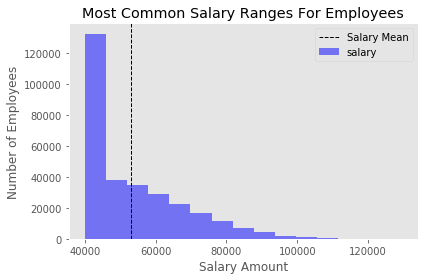

<Figure size 432x288 with 0 Axes>

In [95]:
salary_df["salary"].plot.hist(bins=15, alpha=0.5, color = 'b')

plt.axvline(salary_df['salary'].mean(), color='k', linestyle='dashed', 
            linewidth=1, label="Salary Mean")
plt.xlabel('Salary Amount')
plt.ylabel('Number of Employees')
plt.legend()
plt.title('Most Common Salary Ranges For Employees')
plt.grid()
plt.tight_layout()
plt.show()

plt.savefig("Most Common Salary Ranges.png")

In [96]:
# Create a bar chart of average salary by title.


st_df = pd.read_sql("""SELECT t.title, s.salary 
FROM titles t 
INNER JOIN employees e
ON t.title_id = e.emp_title_id
JOIN salaries s
ON s.emp_no = e.emp_no """, con=engine )

In [97]:
st_df
st_df.head()

,title,salary
0,Engineer,48973
1,Senior Engineer,40000
2,Technique Leader,43548
3,Staff,63377
4,Senior Engineer,40000


In [98]:
group_sal = st_df.groupby(st_df["title"])
avg_salary = group_sal["salary"].mean()
avg_salary

title
Assistant Engineer    48564.434447
Engineer              48535.336511
Manager               51531.041667
Senior Engineer       48506.799871
Senior Staff          58550.172704
Staff                 58465.382850
Technique Leader      48582.896092
Name: salary, dtype: float64

In [99]:
average_salary_df = pd.DataFrame({'avg salary': avg_salary})
avg_sal = average_salary_df.reset_index()
avg_sal

,title,avg salary
0,Assistant Engineer,48564.434447
1,Engineer,48535.336511
2,Manager,51531.041667
3,Senior Engineer,48506.799871
4,Senior Staff,58550.172704
5,Staff,58465.382850
6,Technique Leader,48582.896092


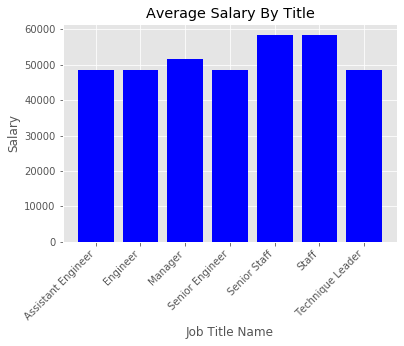

<Figure size 432x288 with 0 Axes>

In [100]:
plt.style.use('ggplot')

x = avg_sal['title']
y = avg_sal['avg salary']


plt.bar(x, y, color='blue')
plt.xlabel("Job Title Name")
plt.ylabel("Salary")
plt.title("Average Salary By Title")

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

plt.savefig("Average Salary_bar.png")

In [101]:
#"Search your ID number."

myself = '''
SELECT * FROM "employees"
WHERE emp_no = '499942'; '''

st_df = pd.read_sql(myself,engine)
st_df

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,499942,e0004,1963-01-10,April,Foolsday,F,1997-02-10
